In [5]:
using StarStats

┌ Info: Precompiling StarStats [136f08ad-8f88-5140-ad46-aabf7ef1cdb5]
└ @ Base loading.jl:1662


In [6]:
?ModelDataGrid

search: ModelDataGrid ModelDataGridLikelihood



```
ModelDataGrid
```

Struct containing the definition of a grid including the input variables defining it and their values 

# Fields:

  * dfs: Multidimensional array of DataFrames containing individual evolutionary track information from a grid of models.       This is populated with the load_grid function.
  * inputs: Vector of String vectors containing the parth of the path from a track. (TODO give an example)
  * input_names: Vector of Symbol containing the names of each parameter of the grid.
  * input_values: Result of parsing the inputs into floats.


In [7]:
function path_constructor(strings::Vector{String})
    DATA_FOLDER = ENV["STARSTATS_TEST_DATA_FOLDER"]
    return DATA_FOLDER*"/LMC/LMC_$(strings[1])_$(strings[2])_$(strings[3]).track.gz"
end

path_constructor (generic function with 1 method)

In [8]:
using Printf
using BenchmarkTools
masses = [@sprintf("%.3f", x) for x in range(0.9,2.1,step=0.025)]
rotation = [@sprintf("%.2f", x) for x in range(0.0,0.9,step=0.1)]
overshoot = [@sprintf("%.2f", x) for x in range(0.5,4.5,step=0.5)]
grid = ModelDataGrid([rotation,masses,overshoot],
    [:rotation,:logM,:overshoot])
#@benchmark 
load_grid(grid,path_constructor); 

In [9]:
observable_names = [:Teff, :logL, :vrot]
observable_values = [4.51974, 4.289877, 70.7195]
observable_errors = [0.2, 0.2, 10]
# potentially parallelize this
grid_likelihood = ModelDataGridLikelihood(grid, observable_names, observable_values, observable_errors);

In [10]:
CI = credible_interval(grid_likelihood, :logM,0.68,1_000_000)

([1.193889893889894, 1.125000225000225, 1.0427065427065427], 8325.806601611876)

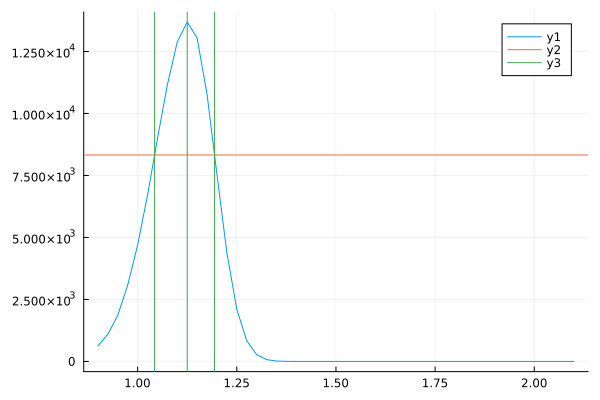

In [11]:
using Plots
ml= marginalized_likelihood(grid_likelihood,[:logM])
plot(grid.input_values[2], ml)
hline!([CI[2]])
vline!(CI[1])

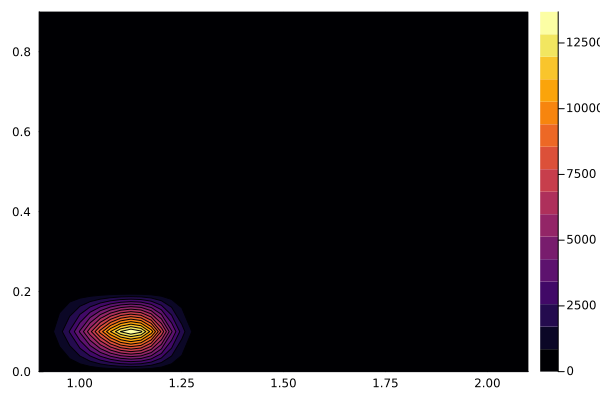

In [12]:
using Plots

ml= marginalized_likelihood(grid_likelihood,[:logM, :rotation])
contour(grid.input_values[2], grid.input_values[1], ml', fill=true)

In [13]:
#for next time 
# track interpolation
# Add comments to package source code

# Turn MESA history into EEP
#   
# Interpolate EEP for single stars
# Incorporate interpolated data into likelihood computation
# Model comparisons

In [18]:
track = grid.dfs[1,1,1]

Row,mass,age,dt,Teff,logL,vrot,logg,s_h1,s_he4,s_c12,s_n14,s_o16,s_ne20,s_mg24,c_h1,c_he4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,7.94328,562.341,2.75,4.40347,3.50142,0.0,4.40523,0.73829,0.256879,0.000494337,8.14827e-5,0.00262316,0.000403374,0.000197144,0.738238,0.256882
2,7.94328,1068.45,2.70424,4.39913,3.48709,0.0,4.40217,0.73829,0.256879,0.000494337,8.14827e-5,0.00262316,0.000403374,0.000197144,0.738229,0.256883
3,7.94328,1523.94,2.65849,4.39681,3.47907,0.0,4.40093,0.73829,0.256879,0.000494337,8.14827e-5,0.00262316,0.000403374,0.000197144,0.73822,0.256884
4,7.94328,1933.89,2.61273,4.39562,3.47453,0.0,4.40069,0.73829,0.256879,0.000494337,8.14827e-5,0.00262316,0.000403374,0.000197144,0.738213,0.256885
5,7.94328,2364.34,2.63392,4.39496,3.47154,0.0,4.40104,0.73829,0.256879,0.000494337,8.14827e-5,0.00262316,0.000403374,0.000197144,0.738208,0.256887
6,7.94328,2816.3,2.65511,4.39464,3.46954,0.0,4.40179,0.73829,0.256879,0.000494337,8.14827e-5,0.00262316,0.000403374,0.000197144,0.738204,0.256889
7,7.94328,3290.87,2.6763,4.39456,3.46817,0.0,4.40282,0.73829,0.256879,0.000494337,8.14827e-5,0.00262316,0.000403374,0.000197144,0.7382,0.25689
8,7.94328,3789.16,2.69748,4.39462,3.46719,0.0,4.40405,0.73829,0.256879,0.000494337,8.14827e-5,0.00262316,0.000403374,0.000197144,0.738197,0.256893
9,7.94328,4312.37,2.71867,4.39477,3.46643,0.0,4.4054,0.73829,0.256879,0.000494337,8.14827e-5,0.00262316,0.000403374,0.000197144,0.738193,0.256895


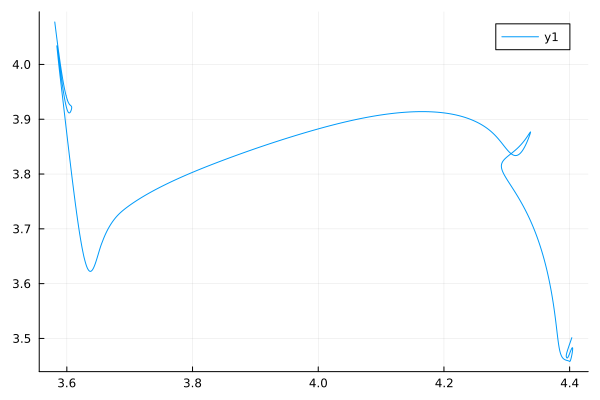

In [19]:
plot()
plot!(track.Teff, track.logL)

In [101]:
function props_logTeff(track, xval)
    target_center_h1 = 0.73 + xval*(0.01-0.73)
    for i in 1:length(track.c_h1)
        if track.c_h1[i] > target_center_h1 && track.c_h1[i+1] <= target_center_h1
            yval1 = track.Teff[i] 
            yval2 = track.Teff[i+1] 
            xval1 = track.c_h1[i] 
            xval2 = track.c_h1[i+1] 
            yval = yval1 +(target_center_h1-xval1)/(xval2-xval1)*(yval2-yval1)
            return yval
        end
    end
end

props_logTeff (generic function with 1 method)

In [102]:
function props_logL(track, xval)
    target_center_h1 = 0.73 + xval*(0.01-0.73)
    for i in 1:length(track.c_h1)
        if track.c_h1[i] > target_center_h1 && track.c_h1[i+1] <= target_center_h1
            yval1 = track.logL[i] 
            yval2 = track.logL[i+1] 
            xval1 = track.c_h1[i] 
            xval2 = track.c_h1[i+1] 
            yval = yval1 +(target_center_h1-xval1)/(xval2-xval1)*(yval2-yval1)
            return yval
        end
    end
end

props_logL (generic function with 1 method)

In [103]:
props_logL(track,0.5)

3.6652981529294935

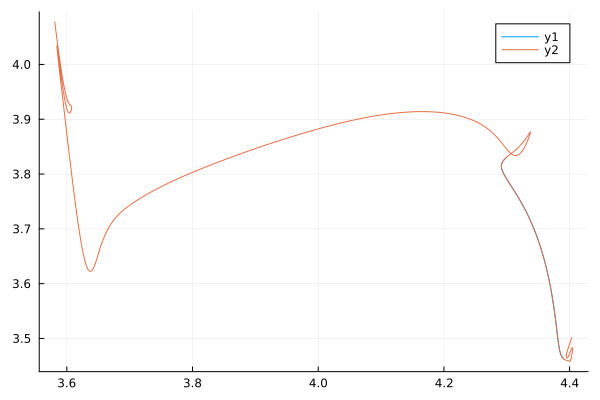

In [104]:
xvals = LinRange(0,1,100)

plot(props_logTeff.(Ref(track),xvals),props_logL.(Ref(track),xvals))
plot!(track.Teff, track.logL)

In [105]:
using Turing
using Distributions

In [106]:
@model function star_model(logTeff_obs, logL_obs, track)
    x ~ Uniform(0,1)
    logTeff = props_logTeff(track, x)
    logL = props_logL(track, x)

    logTeff_obs ~ Normal(logTeff, 0.0001)
    logL_obs ~ Normal(logL, 0.0001)
end

star_model (generic function with 2 methods)

In [107]:
chain = sample(star_model(4.354016117179741,3.6652981529294935,track), NUTS(2_000,0.6), 10_000; progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /lhome/pablom/.julia/packages/AdvancedHMC/iWHPQ/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /lhome/pablom/.julia/packages/AdvancedHMC/iWHPQ/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /lhome/pablom/.julia/packages/AdvancedHMC/iWHPQ/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /lhome/pablom/.julia/packages/AdvancedHMC/iWHPQ/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (tru

Chains MCMC chain (10000×13×1 Array{Float64, 3}):

Iterations        = 2001:1:12000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 7.19 seconds
Compute duration  = 7.19 seconds
parameters        = x
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           x    0.5000    0.0003     0.0000    0.0000   7274.5338    1.0001    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           x    0.4995    0.4998    0.5000    0.5002    0.5005


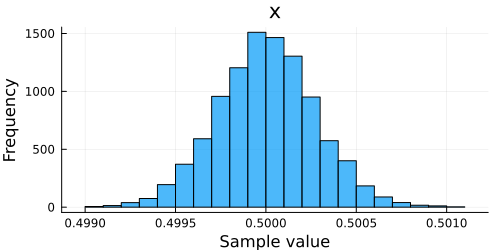

In [108]:
histogram(chain)